CRISP DM: Business Understanding
The primary goal is to identify the characteristics of someone who is actively seeking a job. 

Project Plan: 
-isolate respondents who are seeking a job and analyze their numerical data
-isolate respondents who are NOT seeking a job and analyze their numerical data
-compare the analysis of the two groups 
-create a visualization displaying the characteristics of the average respondent who is seeking a job

I will know my analysis is sucessful if it provides insight into the characteristics of one who is actively seeking a job.

My data comes from the 2017 StackOverflow Annual Developer Survey.

First, let's read in the data from the StackOverflow 2017 Survey. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./2017_SOF.csv') #read in the dataset
df.head() #display dataset

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


CRISP DM: Data Understanding
I have collected the data from the StackOverflow Survey. 

It is a large dataset with 154 columns and a mix of numerical and categorical data.

It contains the following columns I will use for my analysis: 
-JobSeekingStatus 
-CareerSatisfaction 
-JobSatisfaction 
-HoursPerWeek 
-StackOverflowSatisfaction 
-Salary 
-ExpectedSalary
 
There is a significant amount of Nan values in the JobSeekingStatus column which will be removed. 

CRISP DM: Prepare Data
I will use the StackOverflow Survey dataset and split the data into two groups using the JobSeekingStatus. It will be split into respondents actively seeking a job and those who are not. 

I will clean up the data by removing and rows containing Nan in the JobSeekingStatus column. 

CRISP DM: Prepare Data

Now we clean up the data by removing any rows containing blank or Nan in the column JobSeekingStatus. Those are useless since I am focusing on respondents who filled in JobSeekingStatus. I then subsetted the data into JobSeekingStatus and numerical columns. 

In [2]:
df = df.dropna(subset = ['JobSeekingStatus'], how = 'any') #clean up data by dropping Nan values
seeking_status = df[["JobSeekingStatus","CareerSatisfaction","JobSatisfaction","HoursPerWeek","StackOverflowSatisfaction","Salary","ExpectedSalary"]] #select jobseeking status and numerical columns
seeking_status.head() #display dataframe

,JobSeekingStatus,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
0,"I'm not actively looking, but I am open to new...",NaN,NaN,0.0,9.0,NaN,NaN
3,I am actively looking for a job,6.0,3.0,5.0,10.0,NaN,NaN
5,"I'm not actively looking, but I am open to new...",NaN,NaN,0.0,6.0,NaN,NaN
6,"I'm not actively looking, but I am open to new...",7.0,6.0,1.0,8.0,NaN,NaN
7,"I'm not actively looking, but I am open to new...",7.0,7.0,1.0,7.0,NaN,NaN


CRISP DM: Prepare Data
I now split the data into two dataframes: not_looking and looking. Each containing data from respondents seeking a job and not seeking a job. Reformatting the data was not required further. 

CRISP DM: Modeling
I am using descriptive statistics to communicate my findings. Histograms and bar charts are the best way to describe the average mean of a large group of data. 

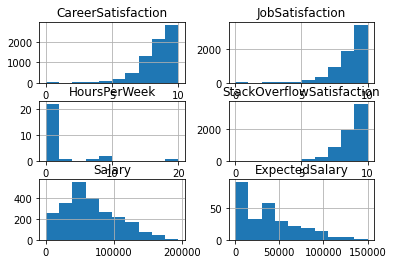

In [3]:
not_looking = seeking_status.loc[df['JobSeekingStatus'] == "I am not interested in new job opportunities"] #df contains respondents not looking for a job
not_looking.hist(); #display histogram 

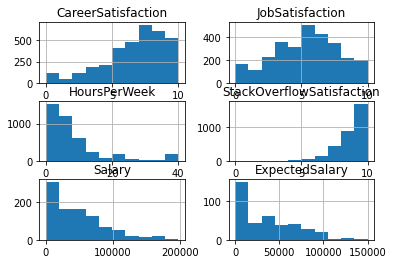

In [5]:
looking = seeking_status.loc[df['JobSeekingStatus'] == "I am actively looking for a job"] #df contains respondents actively seeking a job
looking.hist(); #display histogram

Based on the histograms above, some major differences can be pointed out between those who are looking for a job and those who are not. Career and Job Satisfaction is left skewed in the notlooking dataset, indicating that the majority of individuals are satisfied. While Career and Job Satisfaction is closely shaped to a bell curve in the looking dataset, indicating satisfaction is more equaly spread out among the job seeking. 

Next, let's compare the means of numerical factors side by side in a bar chart.

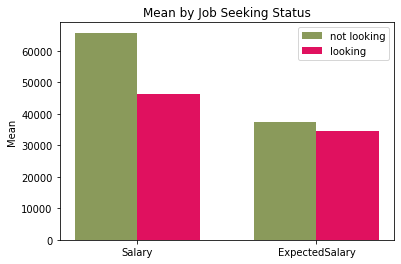

In [7]:
#calculate mean of CareerSatisfaction, JobSatisfaction, HoursPerWeek, StackOverflowSatisfaction, Salary and,ExpectedSalary
#for looking dataset
lcs = looking["CareerSatisfaction"].mean()
ljs = looking["JobSatisfaction"].mean()
lhpw = looking["HoursPerWeek"].mean()
ls = looking["Salary"].mean()
les = looking["ExpectedSalary"].mean()

#calculate mean of CareerSatisfaction, JobSatisfaction, HoursPerWeek, StackOverflowSatisfaction, Salary and,ExpectedSalary
#for not_looking dataset
nlcs = not_looking["CareerSatisfaction"].mean()
nljs = not_looking["JobSatisfaction"].mean()
nlhpw = not_looking["HoursPerWeek"].mean()
nls = not_looking["Salary"].mean()
nles = not_looking["ExpectedSalary"].mean()

labels = ["CareerSatisfaction","JobSatisfaction","HoursPerWeek"] #label bars for visualization
looking_means = [lcs,ljs,lhpw] #organize CareerSatisfaction, JobSatisfaction, HoursPerWeek from looking dataset into list
not_looking_means = [nlcs,nljs,nlhpw] #organize CareerSatisfaction, JobSatisfaction, HoursPerWeek from not_looking dataset into list
width = 0.35 #set bar width for barchart visualization

ind = np.arange(2) #set number of bars

#set colors for bars in visualization
plt.bar(ind, (nls,nles), width, label = "not looking", color=('#8A9A5B'))
plt.bar(ind + width, (ls,les),width,label = "looking", color=('#E0115F'))

#set up Salary and ExpectedSalary barchart for Mean by Job Seeking Status
plt.ylabel('Mean')
plt.title('Mean by Job Seeking Status')
plt.xticks(ind + width / 2, ("Salary","ExpectedSalary"))
plt.legend()
plt.show()

The average salary for those not looking is about $12,000 more than those who are looking. While the Expected Salary has a much lower gap at about $2,000 more for those who are not looking for a job. It is not a surpise that those not looking for a job have a higher salary on average.

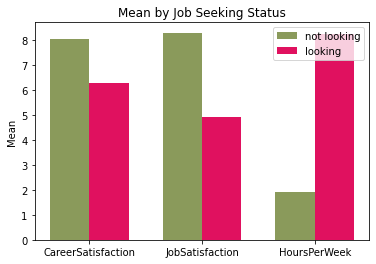

In [8]:
ind = np.arange(3) #set number of bars

#select bar colors
plt.bar(ind, not_looking_means, width, label = "not looking", color=('#8A9A5B'))
plt.bar(ind + width, looking_means,width,label = "looking", color=('#E0115F'))

#set up CareerSatisfaction, JobSatisfaction, and HoursPerWeek barchart for Mean by Job Seeking Status
plt.ylabel('Mean')
plt.title('Mean by Job Seeking Status')
plt.xticks(ind + width / 2, labels)
plt.legend()

plt.show()

CRISP DM: Evaluation of Results 
The models meet the business criteria by describing the numerical characteristic of what someone who is looking for a job. The average Salary, ExpectedSalary, CareerSatisfaction, JobSatisfaction, and HoursPerWeek are shown in the visualizations above. 

From the chart above, it is clear that those not looking for a job have a higher Career and Job Satisfaction on average. The most significant of the two being Job Satisfaction, where those not looking for a job are more satisfied on average by 3 points. In regards to hours per week, those looking for a job work an average of 6 more hours per week than those not looking. 

In conclusion, respondents who are actively seeking a job, on average, tend to make less money, work more hours, and have a lower career and job satisfaction than those who are not looking for a job. 

The next steps are to proceed to deployment by publishing my findings to Medium. Also, search for more ways to use descriptive statistics to create the profile of someone who is actively seeking a job. 